# Fraud Transaction Detection

Objective:

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
!pip install scikit-learn xgboost matplotlib seaborn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to the folder containing pkl files
data_folder = '/content/drive/MyDrive/Unified Mentor Projects/Data files/fraud transaction detection pkl'

# List all .pkl files
file_list = sorted([f for f in os.listdir(data_folder) if f.endswith('.pkl')])

# Load and concatenate all dataframes
all_dfs = []

for file_name in file_list:
    file_path = os.path.join(data_folder, file_name)
    df = pd.read_pickle(file_path)
    all_dfs.append(df)


In [ ]:
# Concatenate into a single dataframe
df = pd.concat(all_dfs, ignore_index=True)

print(df.shape)


(1754155, 9)


In [ ]:
print(df.head())

   TRANSACTION_ID         TX_DATETIME CUSTOMER_ID TERMINAL_ID  TX_AMOUNT  \
0               0 2018-04-01 00:00:31         596        3156      57.16   
1               1 2018-04-01 00:02:10        4961        3412      81.51   
2               2 2018-04-01 00:07:56           2        1365     146.00   
3               3 2018-04-01 00:09:29        4128        8737      64.49   
4               4 2018-04-01 00:10:34         927        9906      50.99   

  TX_TIME_SECONDS TX_TIME_DAYS  TX_FRAUD  TX_FRAUD_SCENARIO  
0              31            0         0                  0  
1             130            0         0                  0  
2             476            0         0                  0  
3             569            0         0                  0  
4             634            0         0                  0  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        object        
 3   TERMINAL_ID        object        
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    object        
 6   TX_TIME_DAYS       object        
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 120.4+ MB


In [ ]:
df.describe()

,TRANSACTION_ID,TX_DATETIME,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO
count,1.754155e+06,1754155,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,2018-07-01 11:20:33.708572160,5.363230e+01,8.369272e-03,1.882388e-02
min,0.000000e+00,2018-04-01 00:00:31,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.385385e+05,2018-05-16 14:40:46.500000,2.101000e+01,0.000000e+00,0.000000e+00
50%,8.770770e+05,2018-07-01 11:11:10,4.464000e+01,0.000000e+00,0.000000e+00
75%,1.315616e+06,2018-08-16 08:01:01.500000,7.695000e+01,0.000000e+00,0.000000e+00
max,1.754154e+06,2018-09-30 23:59:57,2.628000e+03,1.000000e+00,3.000000e+00
std,5.063811e+05,NaN,4.232649e+01,9.110012e-02,2.113263e-01


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
TRANSACTION_ID,1754155.0,877077.0,0.0,438538.5,877077.0,1315615.5,1754154.0,506381.075062
TX_DATETIME,1754155,2018-07-01 11:20:33.708572160,2018-04-01 00:00:31,2018-05-16 14:40:46.500000,2018-07-01 11:11:10,2018-08-16 08:01:01.500000,2018-09-30 23:59:57,NaN
TX_AMOUNT,1754155.0,53.632302,0.0,21.01,44.64,76.95,2628.0,42.326492
TX_FRAUD,1754155.0,0.008369,0.0,0.0,0.0,0.0,1.0,0.0911
TX_FRAUD_SCENARIO,1754155.0,0.018824,0.0,0.0,0.0,0.0,3.0,0.211326


In [ ]:
df.isnull().sum()

,0
TRANSACTION_ID,0
TX_DATETIME,0
CUSTOMER_ID,0
TERMINAL_ID,0
TX_AMOUNT,0
TX_TIME_SECONDS,0
TX_TIME_DAYS,0
TX_FRAUD,0
TX_FRAUD_SCENARIO,0


In [ ]:
df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO'],
      dtype='object')

In [ ]:
df.dtypes

,0
TRANSACTION_ID,int64
TX_DATETIME,datetime64[ns]
CUSTOMER_ID,object
TERMINAL_ID,object
TX_AMOUNT,float64
TX_TIME_SECONDS,object
TX_TIME_DAYS,object
TX_FRAUD,int64
TX_FRAUD_SCENARIO,int64


In [ ]:
# Finds the count of phishing and legitimate websites
fraud_transactions = df.loc[df['TX_FRAUD'] == 1] # find all rows that are fraudulent
legitimate_transactions = df.loc[df['TX_FRAUD'] == 0] # final all rows that aren't fraudulent
print('Fraud transactions count: ', len(fraud_transactions))
print('Legitimate transactions count: ', len(legitimate_transactions))

Fraud transactions count:  14681
Legitimate transactions count:  1739474


In [ ]:
print('Fraud transactions count: ', len(fraud_transactions), ' or comprises', round(len(fraud_transactions)/len(df)*100, 2), '% of the dataset')
print('Legitimate transactions count: ', len(legitimate_transactions), ' or comprises', round(len(legitimate_transactions)/len(df)*100, 2), '% of the dataset')

Fraud transactions count:  14681  or comprises 0.84 % of the dataset
Legitimate transactions count:  1739474  or comprises 99.16 % of the dataset


<Axes: ylabel='count'>

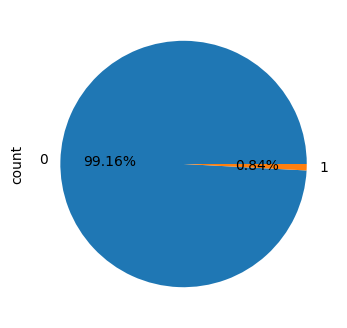

In [ ]:
fig = plt.figure(figsize=(4,4))
df['TX_FRAUD'].value_counts().plot.pie(autopct='%0.2f%%')

Text(0.5, 1.0, 'Status Distributions \n (Legitimate || Fraudulent)')

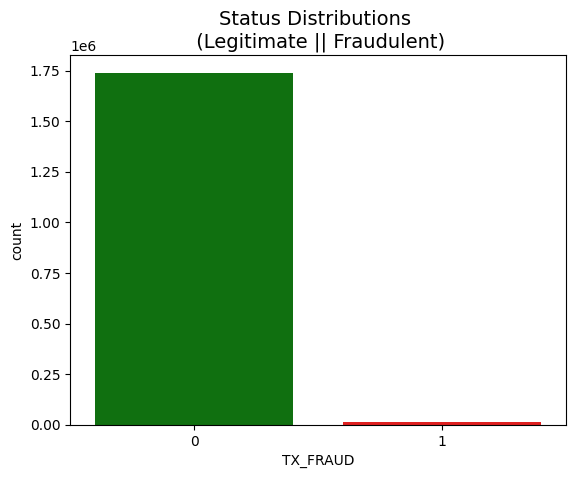

In [ ]:
colors = ['Green', 'red']
sns.countplot(x='TX_FRAUD', data=df,palette=colors)
plt.title('Status Distributions \n (Legitimate || Fraudulent)', fontsize=14)

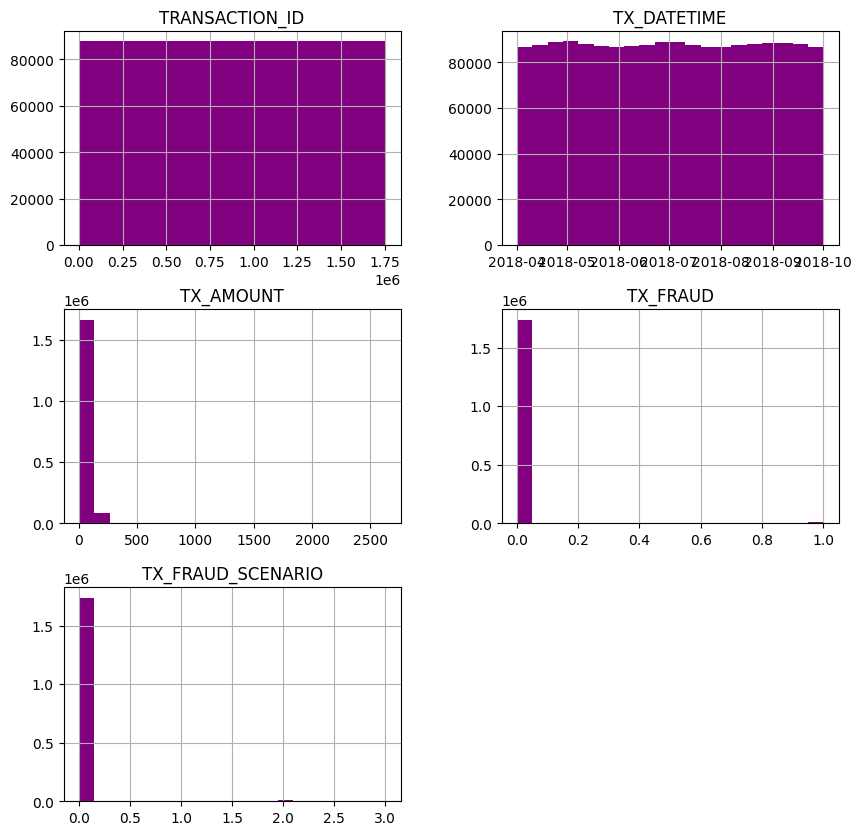

In [ ]:
#Plotting the data distribution
df.hist(bins = 20,figsize = (10,10),color='purple')
plt.show()

In [ ]:
corr=df.corr()
corr

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
TRANSACTION_ID,1.000000,0.999999,-0.000389,-0.000690,0.000521,0.999999,0.999985,0.008689,0.008173
TX_DATETIME,0.999999,1.000000,-0.000389,-0.000690,0.000521,1.000000,0.999992,0.008685,0.008168
CUSTOMER_ID,-0.000389,-0.000389,1.000000,0.000389,-0.000757,-0.000389,-0.000389,-0.003321,-0.004135
TERMINAL_ID,-0.000690,-0.000690,0.000389,1.000000,-0.000166,-0.000690,-0.000690,-0.005678,-0.004995
TX_AMOUNT,0.000521,0.000521,-0.000757,-0.000166,1.000000,0.000521,0.000521,0.168290,0.195008
TX_TIME_SECONDS,0.999999,1.000000,-0.000389,-0.000690,0.000521,1.000000,0.999992,0.008685,0.008168
TX_TIME_DAYS,0.999985,0.999992,-0.000389,-0.000690,0.000521,0.999992,1.000000,0.008687,0.008169
TX_FRAUD,0.008689,0.008685,-0.003321,-0.005678,0.168290,0.008685,0.008687,1.000000,0.969587
TX_FRAUD_SCENARIO,0.008173,0.008168,-0.004135,-0.004995,0.195008,0.008168,0.008169,0.969587,1.000000


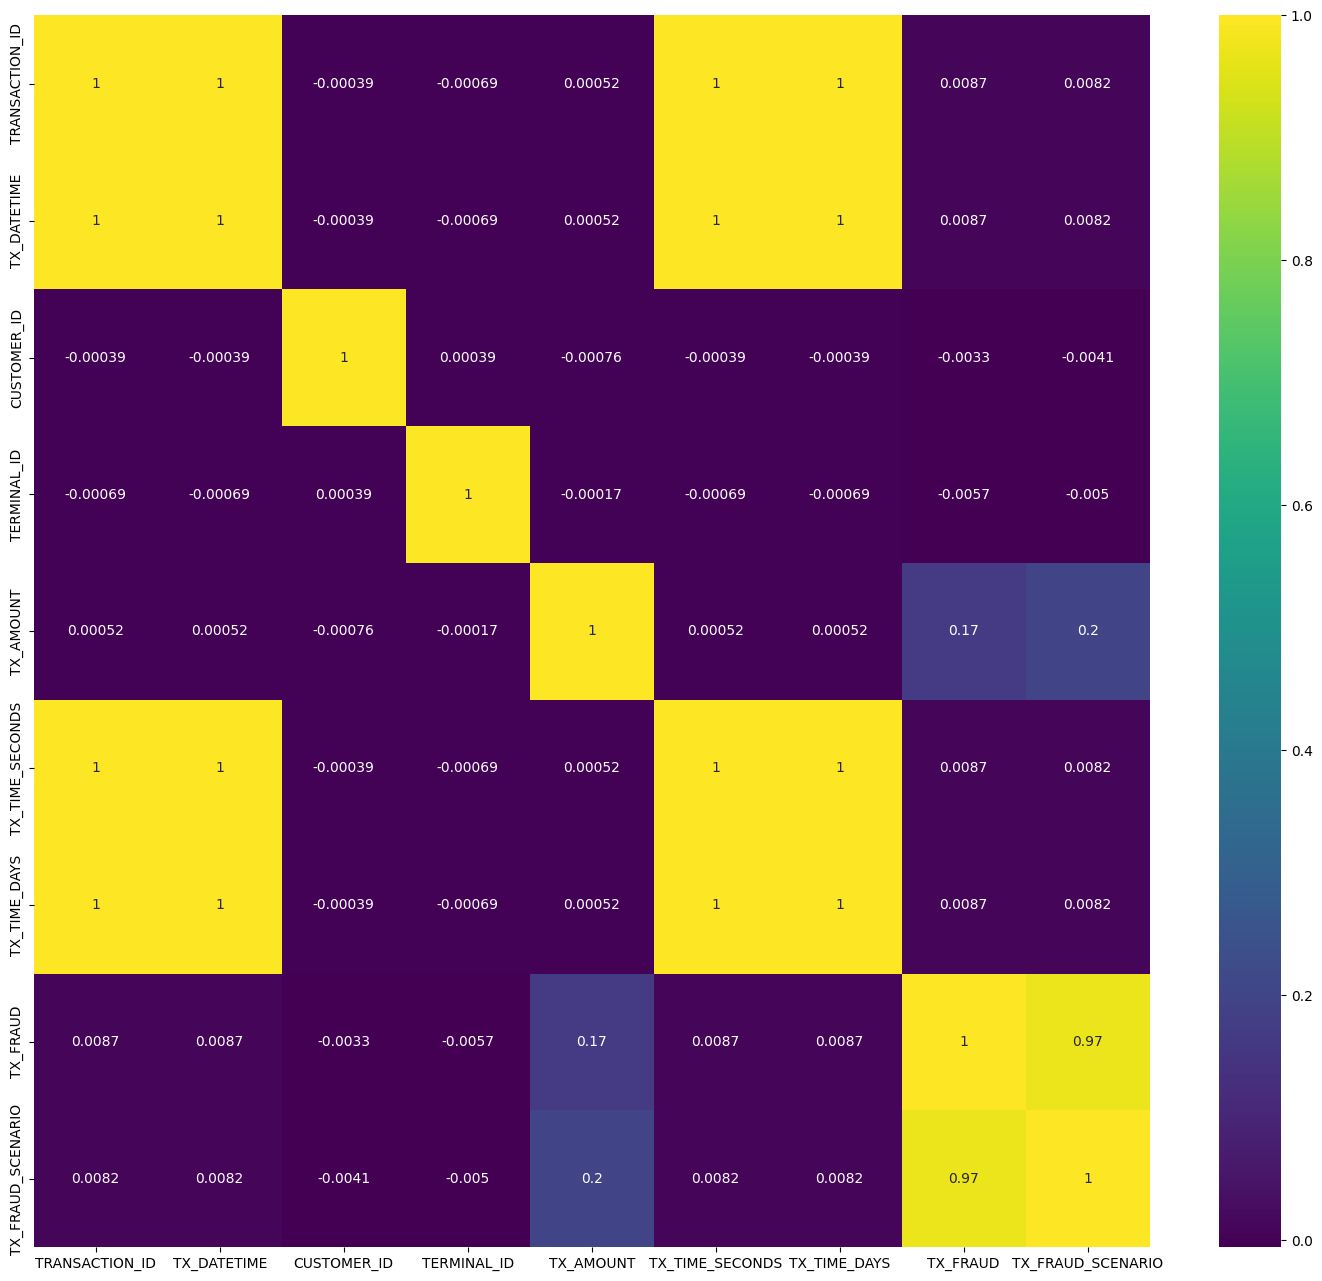

In [ ]:
# Checking the correlation in heatmap
plt.figure(figsize=(18,16))

sns.heatmap(corr,cmap='viridis',annot=True)
plt.show()

In [ ]:
df.tail()

,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,CUSTOMER_ID_FREQ,TERMINAL_ID_FREQ,TX_HOUR,TX_DAY
1754150,54.24,15810996.0,182.0,0,0,2,2,23,30
1754151,1.23,15811058.0,182.0,0,0,1,2,23,30
1754152,6.62,15811101.0,182.0,0,0,5,2,23,30
1754153,55.40,15811192.0,182.0,0,0,3,2,23,30
1754154,23.59,15811197.0,182.0,0,0,5,5,23,30


In [ ]:
df.dtypes

,0
TX_AMOUNT,float64
TX_TIME_SECONDS,float64
TX_TIME_DAYS,float64
TX_FRAUD,int64
TX_FRAUD_SCENARIO,int64
CUSTOMER_ID_FREQ,int64
TERMINAL_ID_FREQ,int64
TX_HOUR,int32
TX_DAY,int32


In [ ]:
print(df['TX_FRAUD'].value_counts())

TX_FRAUD
0    9569
1      80
Name: count, dtype: int64


In [ ]:
#Convert column types:
df["TX_TIME_SECONDS"] = pd.to_numeric(df["TX_TIME_SECONDS"], errors="coerce")
df["TX_TIME_DAYS"] = pd.to_numeric(df["TX_TIME_DAYS"], errors="coerce")

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_customer = LabelEncoder()
df["CUSTOMER_ID"] = le_customer.fit_transform(df["CUSTOMER_ID"])

le_terminal = LabelEncoder()
df["TERMINAL_ID"] = le_terminal.fit_transform(df["TERMINAL_ID"])


In [ ]:
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,595,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4951,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4118,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,926,9906,50.99,634,0,0,0


In [ ]:
df.dtypes

,0
TRANSACTION_ID,int64
TX_DATETIME,datetime64[ns]
CUSTOMER_ID,int64
TERMINAL_ID,int64
TX_AMOUNT,float64
TX_TIME_SECONDS,int64
TX_TIME_DAYS,int64
TX_FRAUD,int64
TX_FRAUD_SCENARIO,int64


In [ ]:
# Frequency encode CUSTOMER_ID and TERMINAL_ID
df['CUSTOMER_ID_FREQ'] = df['CUSTOMER_ID'].map(df['CUSTOMER_ID'].value_counts())
df['TERMINAL_ID_FREQ'] = df['TERMINAL_ID'].map(df['TERMINAL_ID'].value_counts())

In [ ]:
# Drop original ID columns and TRANSACTION_ID
df = df.drop(['TRANSACTION_ID', 'CUSTOMER_ID', 'TERMINAL_ID'], axis=1)

In [ ]:
#Convert TX_DATETIME to Features
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
df['TX_HOUR'] = df['TX_DATETIME'].dt.hour
df['TX_DAY'] = df['TX_DATETIME'].dt.day
df = df.drop('TX_DATETIME', axis=1)

In [ ]:
# Ensure all Columns are Numeric
df['TX_TIME_SECONDS'] = df['TX_TIME_SECONDS'].astype(float)
df['TX_TIME_DAYS'] = df['TX_TIME_DAYS'].astype(float)


In [ ]:
df.dtypes


,0
TX_AMOUNT,float64
TX_TIME_SECONDS,float64
TX_TIME_DAYS,float64
TX_FRAUD,int64
TX_FRAUD_SCENARIO,int64
CUSTOMER_ID_FREQ,int64
TERMINAL_ID_FREQ,int64
TX_HOUR,int32
TX_DAY,int32


In [ ]:
df.shape

(1754155, 9)

In [ ]:
print(df['TX_FRAUD'].value_counts())

TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64


# Splitting the data in to X and y

In [ ]:
X = df.drop(['TX_FRAUD', 'TX_FRAUD_SCENARIO'], axis=1)  # Features
y = df['TX_FRAUD']  # Target

# Train-Test Split (Before SMOTE)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



In [ ]:
X_train.shape

(1403324, 7)

In [ ]:
X_test.shape

(350831, 7)

In [ ]:
y_train.shape

(1403324,)

In [ ]:
y_test.shape

(350831,)

**Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Apply Smote**

In [ ]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_balanced))


Before SMOTE: Counter({0: 1391579, 1: 11745})
After SMOTE: Counter({0: 1391579, 1: 1391579})


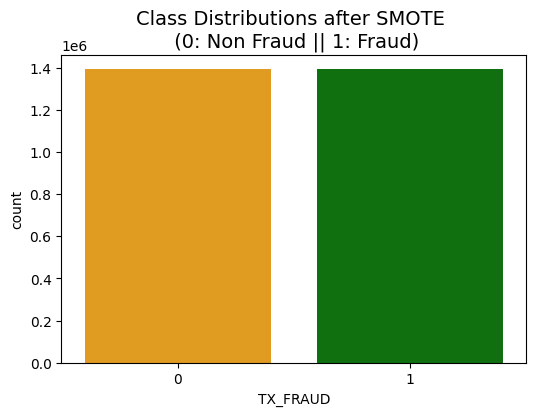

In [ ]:
plt.figure(figsize=(6,4))
colors = ['Orange', 'Green']
sns.countplot(x=y_train_balanced,palette=colors)
plt.title('Class Distributions after SMOTE \n (0: Non Fraud || 1: Fraud)', fontsize=14)
plt.show()

In [ ]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, y_pred):
    cm=confusion_matrix(y_test, y_pred)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.cool)
    categoryNames = ['Non-Fraudalent','Fraudalent']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ticks =  np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks,categoryNames)
    s = [['TN', 'FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i,str(s[i][j])+" =  "+str(cm[i][j]),fontsize=9)
    plt.show()

In [ ]:
def evaluate_model(df_Results, Methodology, model_type, X_train, y_train, X_test, y_test):
    model_label = ""

    if model_type in ["logistic_l1", "logistic_l2"]:
        from sklearn.linear_model import LogisticRegressionCV
        from sklearn.model_selection import KFold
        penalty = 'l1' if model_type == "logistic_l1" else 'l2'
        solver = 'liblinear' if penalty == 'l1' else 'newton-cg'
        model = LogisticRegressionCV(
            Cs=list(np.power(10.0, np.arange(-10, 10))),
            penalty=penalty,
            scoring='roc_auc',
            cv=KFold(n_splits=10, shuffle=True, random_state=42),
            random_state=42,
            max_iter=10000,
            fit_intercept=True,
            solver=solver,
            tol=10
        )
        model_label = f"Logistic Regression ({penalty.upper()})"
    elif model_type == "knn":
        from sklearn.neighbors import KNeighborsClassifier
        model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
        model_label = "KNN"
    elif model_type in ["decision_tree_gini", "decision_tree_entropy"]:
        from sklearn.tree import DecisionTreeClassifier
        crit = "gini" if model_type == "decision_tree_gini" else "entropy"
        model = DecisionTreeClassifier(criterion=crit, random_state=42)
        model_label = f"Decision Tree ({crit})"
    elif model_type == "random_forest":
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        model_label = "Random Forest"
    elif model_type == "xgboost":
        from xgboost import XGBClassifier
        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
        model_label = "XGBoost"
    elif model_type == "svm":
        from sklearn.svm import SVC
        model = SVC(kernel='linear', probability=True, random_state=42)
        model_label = "SVM"
    else:
        raise ValueError("Unsupported model type")

    # Train and evaluate
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    print(f"\n=== {model_label} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC AUC : {roc:.4f}")
    print(classification_report(y_test, y_pred))
    Plot_confusion_matrix(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_label} (AUC = {roc:.2f})')

    df_Results = pd.concat([
        df_Results,
        pd.DataFrame({
            'Methodology': Methodology,
            'Model': model_label,
            'Accuracy': acc,
            'roc_value': roc
        }, index=[0])
    ], ignore_index=True)

    return df_Results, model, model_label



=== Logistic Regression (L2) ===
Accuracy: 0.9916
ROC AUC : 0.5000
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    347895
           1       0.00      0.00      0.00      2936

    accuracy                           0.99    350831
   macro avg       0.50      0.50      0.50    350831
weighted avg       0.98      0.99      0.99    350831



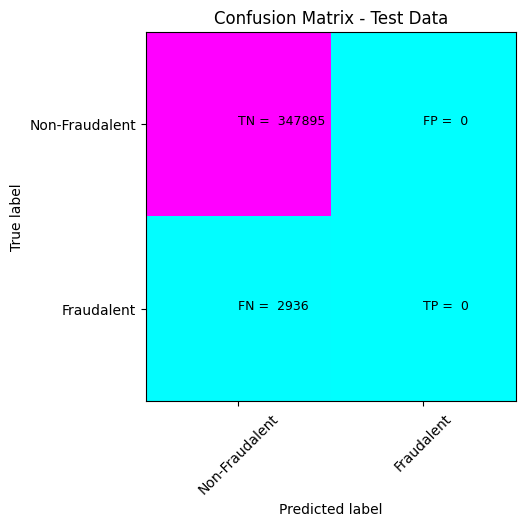


=== Logistic Regression (L1) ===
Accuracy: 0.9916
ROC AUC : 0.5000
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    347895
           1       0.00      0.00      0.00      2936

    accuracy                           0.99    350831
   macro avg       0.50      0.50      0.50    350831
weighted avg       0.98      0.99      0.99    350831



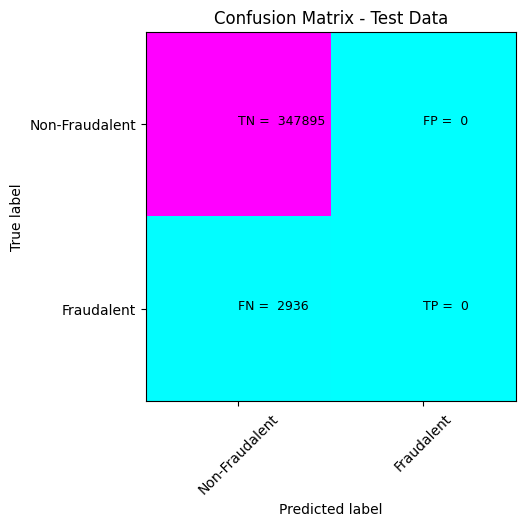


=== KNN ===
Accuracy: 0.9178
ROC AUC : 0.6196
              precision    recall  f1-score   support

           0       0.99      0.92      0.96    347895
           1       0.03      0.30      0.06      2936

    accuracy                           0.92    350831
   macro avg       0.51      0.61      0.51    350831
weighted avg       0.99      0.92      0.95    350831



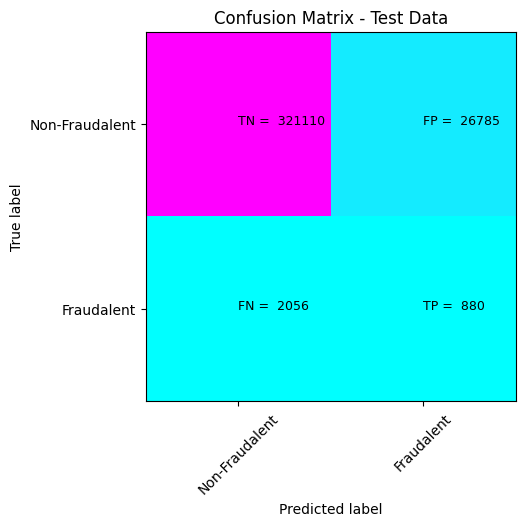


=== Decision Tree (gini) ===
Accuracy: 0.9832
ROC AUC : 0.6168
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    347895
           1       0.16      0.24      0.20      2936

    accuracy                           0.98    350831
   macro avg       0.58      0.62      0.59    350831
weighted avg       0.99      0.98      0.98    350831



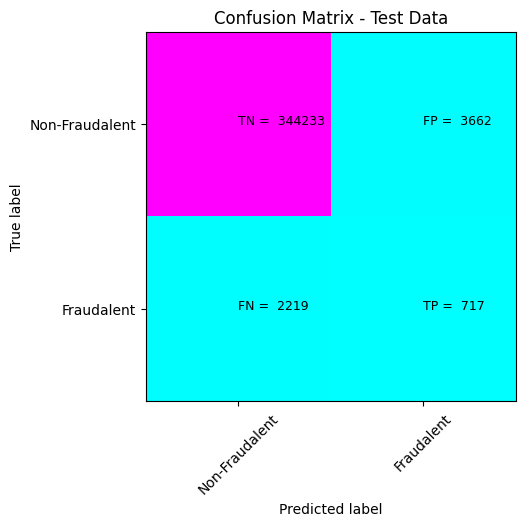


=== Decision Tree (entropy) ===
Accuracy: 0.9844
ROC AUC : 0.6147
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    347895
           1       0.18      0.24      0.20      2936

    accuracy                           0.98    350831
   macro avg       0.59      0.61      0.60    350831
weighted avg       0.99      0.98      0.99    350831



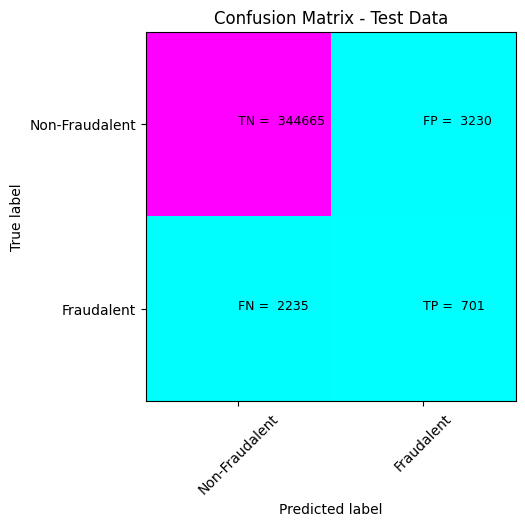


=== XGBoost ===
Accuracy: 0.9928
ROC AUC : 0.6768
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    347895
           1       0.73      0.23      0.35      2936

    accuracy                           0.99    350831
   macro avg       0.86      0.62      0.67    350831
weighted avg       0.99      0.99      0.99    350831



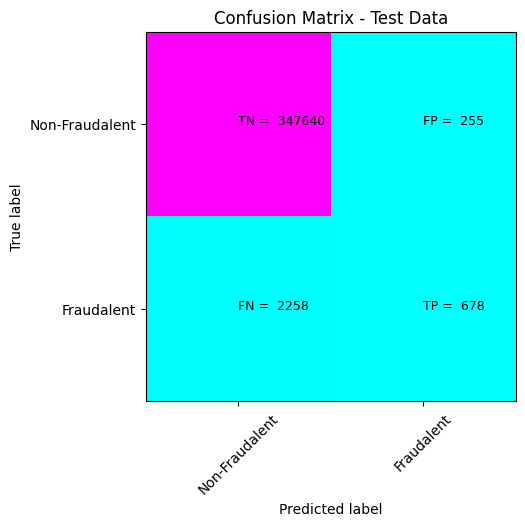

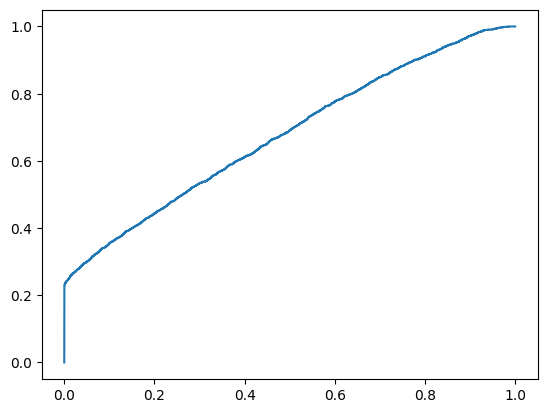

In [ ]:
df_Results = pd.DataFrame()
Methodology = "SMOTE with Scaled Features"
models_info = []  # To collect models and their names for ROC comparison

model_types = [
    "logistic_l2", "logistic_l1",
    "knn",
    "decision_tree_gini", "decision_tree_entropy","xgboost"
    #"random_forest","svm"
]

for model_type in model_types:
    df_Results, fitted_model, fitted_model_label = evaluate_model(
        df_Results, Methodology, model_type,
        X_train_balanced, y_train_balanced,
        X_test_scaled, y_test

    )
    models_info.append((fitted_model_label, fitted_model, X_test_scaled))


In [ ]:
import joblib

# Add a composite score column: average of accuracy and ROC AUC
df_Results['composite_score'] = (df_Results['Accuracy'] + df_Results['roc_value']) / 2

# Find best row
best_row = df_Results.loc[df_Results['composite_score'].idxmax()]
best_label = best_row['Model']
best_acc = best_row['Accuracy']
best_roc = best_row['roc_value']
best_score = best_row['composite_score']

# Find the actual model object from models_info
best_model = None
for label, model, _ in models_info:
    if label == best_label:
        best_model = model
        break

# Save the best model
joblib.dump(best_model, 'best_fraud_model.pkl')
print(f" Saved best model: {best_label}")
print(f"    Accuracy  : {best_acc:.4f}")
print(f"    ROC AUC   : {best_roc:.4f}")
print(f"    Final Score: {best_score:.4f}")


✅ Saved best model: XGBoost
    Accuracy  : 0.9928
    ROC AUC   : 0.6768
    Final Score: 0.8348


In [ ]:
df_Results

,Methodology,Model,Accuracy,roc_value,composite_score
0,SMOTE with Scaled Features,Logistic Regression (L2),0.991631,0.500000,0.745816
1,SMOTE with Scaled Features,Logistic Regression (L1),0.991631,0.500000,0.745816
2,SMOTE with Scaled Features,KNN,0.917792,0.619597,0.768694
3,SMOTE with Scaled Features,Decision Tree (gini),0.983237,0.616842,0.800039
4,SMOTE with Scaled Features,Decision Tree (entropy),0.984423,0.614738,0.799580
5,SMOTE with Scaled Features,XGBoost,0.992837,0.676832,0.834834


In [ ]:
# Create a New Function to Store and Plot ROC Curves
def compare_all_roc_curves(models_info, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc

    plt.figure(figsize=(10, 8))

    for model_name, model, X_test in models_info:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Comparison of ROC Curves for All Models')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


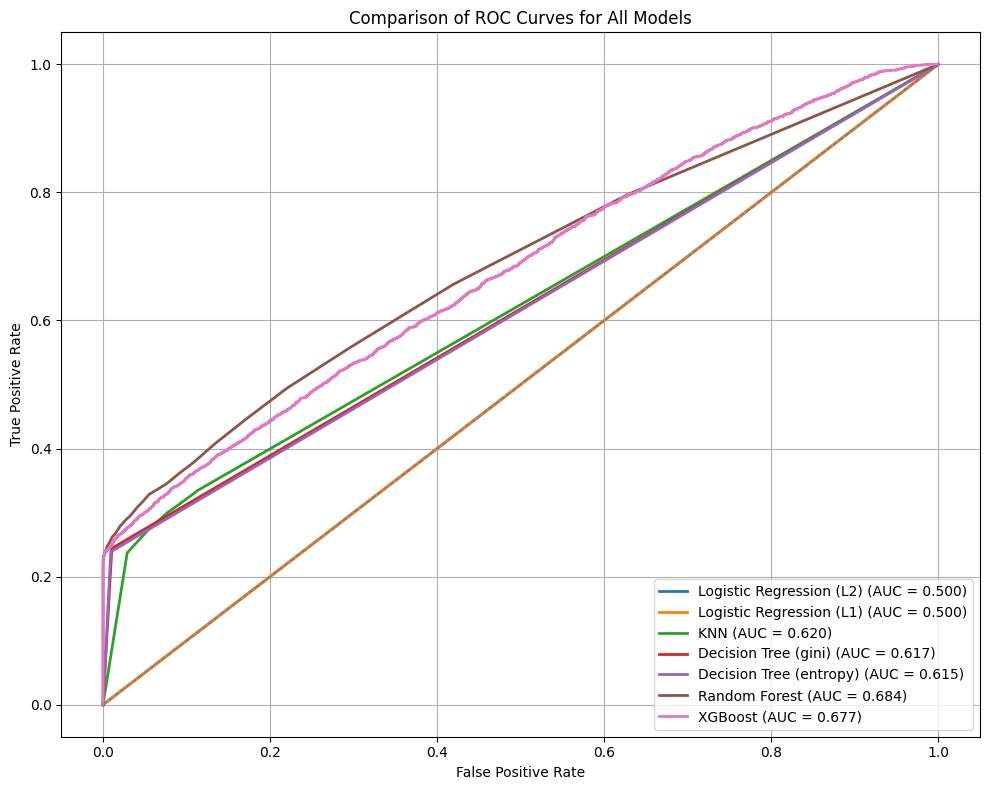

In [ ]:
compare_all_roc_curves(models_info, y_test)


In [ ]:
plt.savefig("all_models_roc.png")

<Figure size 640x480 with 0 Axes>